In [1]:
#these magic statements can be removed once development is complete
%reload_ext autoreload
%autoreload 2

## Converting MVP notebook into an on-demand .py
## Takes input of member ID and metric type
## Produces relevant output

#custom-built module!
import metric_utils
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

df = pd.read_csv('./effectiveness.csv')

# demo purposes
from IPython.display import Image, display
%matplotlib inline

In [2]:
# input placeholders
temp_id = 'H001075'

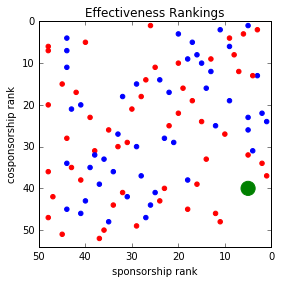

In [3]:
e = metric_utils.effectiveness()
ef = e.generate_plot(df, temp_id)
# ef should be able to get passed to the canvas via canvas=FigureCanvas(ef)
# in reference to https://scipy-cookbook.readthedocs.io/items/Matplotlib_Django.html

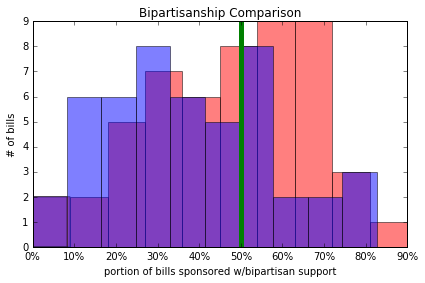

In [4]:
b = metric_utils.bipartisanship()
bf = b.generate_plot(df, temp_id)

In [5]:
e_stats = e.key_stats(df, temp_id)
b_stats = b.key_stats(df, temp_id)

### Possible output text to go along with effectiveness

In [21]:
print "Key Data to help interpret %s's legislative effectiveness rankings:" %e_stats['name']
print ""
print "Effectiveness is an indication of how successful members are at writing bills that go on to become law. \
Being ranked #1 would mean that the member sponsors or cosponsors bills that make it further along in the \
legislative process, on average, than the rest of the members in his or her caucus."
print ""
print "This member has sponsored %s bills in the current legislative session, \
which is more than %0.2f percent of other members from the same caucus." \
       %(e_stats['sponsor_count'],e_stats['sponsor_count_percentile'] * 100)

print ""
print "This member has co-sponsored %s bills in the current legislative session, \
which is more than %0.2f percent of other members from the same caucus." \
       %(e_stats['cosponsor_count'],e_stats['cosponsor_count_percentile'] * 100)

print ""
print "Regardless of the number of bills, %s is ranked %s in effectiveness for bills sponsored \
and %s in effectiveness for bills cosponsored (out of %s)." \
       %(e_stats['name'], e_stats['sponsor_effectiveness_rank'], e_stats['cosponsor_effectiveness_rank'], e_stats['out_of'])
print ""
print ""

Key Data to help interpret Kamala Harris's legislative effectiveness rankings:

Effectiveness is an indication of how successful members are at writing bills that go on to become law. Being ranked #1 would mean that the member sponsors or cosponsors bills that make it further along in the legislative process, on average, than the rest of the members in his or her caucus.

This member has sponsored 8 bills in the current legislative session, which is more than 8.70 percent of other members from the same caucus.

This member has co-sponsored 143 bills in the current legislative session, which is more than 17.39 percent of other members from the same caucus.

Regardless of the number of bills, Kamala Harris is ranked 5 in effectiveness for bills sponsored and 40 in effectiveness for bills cosponsored (out of 46).




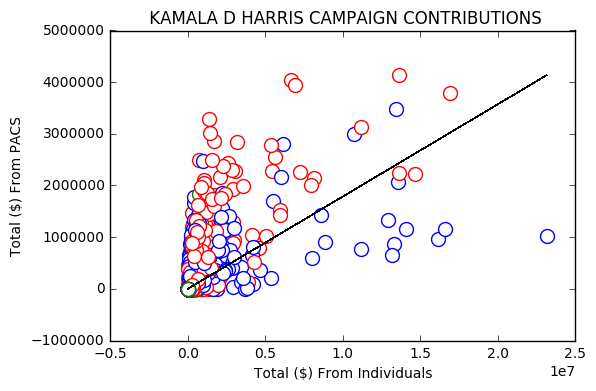

In [4]:
df1 = pd.read_csv("findata/fincampaign.csv",header=None)
f = metric_utils.financials()
ff = f.fin_plot(df1, "S6CA00584")

Public Perception of  Kamala Harris 

Total Tweets:  2200 

Positive Tweets:  500 

Negative Tweets:  400 


Topics: 

1  -  Health  :  1 tweet(s).
2  -  Government Operations And Politics  :  1 tweet(s).
3  -  Democrat :  2 tweet(s).
4  -  Taxation  :  2 tweet(s).
5  -  Civil Rights And Liberties, Minority Issues  :  1 tweet(s).
6  -  Immigration  :  1 tweet(s).
7  -  @Senkamalaharris :  15 tweet(s).
8  -  Environmental Protection  :  1 tweet(s).


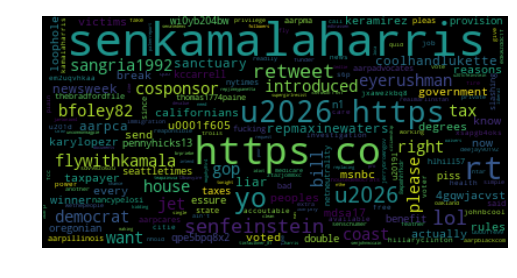

In [2]:
df_t = pd.read_csv('findata/final_twitter_df.csv')
t = metric_utils.twitter_stuff()
tt = t.twitter(df_t, "H001075")